# Sensitivity Analysis of the Soil Moisture Dataset

Soil Moisture Dataset

Libraries we need are imported first

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import xarray as xr
from scipy.interpolate import griddata
from scipy import interpolate
import statsmodels.api as sm

Data used in this exercise is stored in the DATA folder

In [4]:
thefile = '../../../DATA/TPdata_199301'

The dataframe is created using the .read_csv function of Pandas

In [8]:
data = pd.read_csv(thefile, sep='\t', header=None)
data

,0,1,2,3,4,5,6,7,8
0,1.0,-89.875,-60.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,-89.875,60.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,-89.875,180.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,-89.625,-20.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,-89.625,20.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
660061,660062.0,89.625,-100.0,NaN,NaN,NaN,NaN,NaN,NaN
660062,660063.0,89.625,-60.0,NaN,NaN,NaN,NaN,NaN,NaN
660063,660064.0,89.875,-60.0,NaN,NaN,NaN,NaN,NaN,NaN
660064,660065.0,89.875,60.0,NaN,NaN,NaN,NaN,NaN,NaN


The original CSV file is structured as a dataframe with the corresponding categories

In [39]:
data.columns = ["cellNr", "latitude", "longitude", "backscatter","emissivity_v","emissivity_h","ts_amplitude","ndvi","lmd_soilWetness"]

In [41]:
data = data.replace('   NaN',pd.NA)

In [15]:
data['backscatter'] = pd.to_numeric(data['backscatter'])
data['emissivity_v'] = pd.to_numeric(data['emissivity_v'])
data['emissivity_h'] = pd.to_numeric(data['emissivity_h'])
data['ts_amplitude'] = pd.to_numeric(data['ts_amplitude'])
data['ndvi'] = pd.to_numeric(data['ndvi'])
data['lmd_soilWetness'] = pd.to_numeric(data['lmd_soilWetness'])

In [19]:
data = data.dropna()

## Scatter Plots

/var/folders/42/4grwdj956wxfq8phsmjtnjdm0000gn/T/ipykernel_3628/3832675563.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ax = pd.plotting.scatter_matrix(data[['backscatter', 'emissivity_v','emissivity_h','ts_amplitude','ndvi','lmd_soilWetness']],ax=ax);


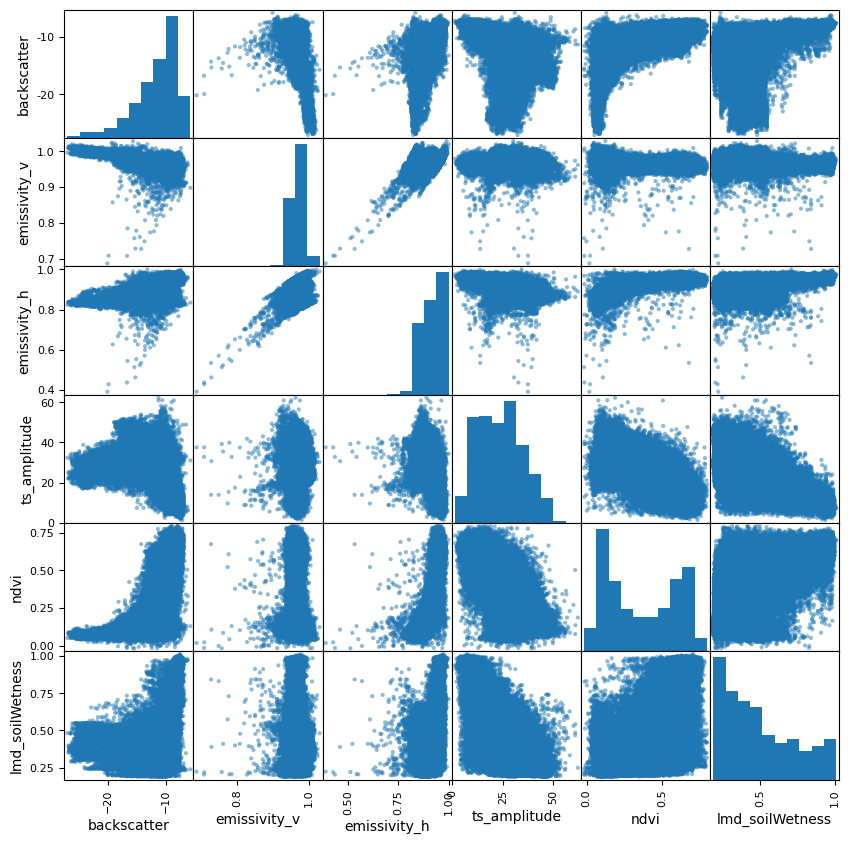

In [23]:
fig, ax = pl.subplots(figsize=(10, 10)) 
ax = pd.plotting.scatter_matrix(data[['backscatter', 'emissivity_v','emissivity_h','ts_amplitude','ndvi','lmd_soilWetness']],ax=ax);

## Correlation Coefficients

In [24]:
data.corr(min_periods=3)

,cellNr,latitude,longitude,backscatter,emissivity_v,emissivity_h,ts_amplitude,ndvi,lmd_soilWetness
cellNr,1.000000,0.999673,-0.070898,-0.244974,0.191138,-0.324772,-0.142787,-0.411075,-0.012247
latitude,0.999673,1.000000,-0.068802,-0.238776,0.188661,-0.319454,-0.148162,-0.405415,-0.010330
longitude,-0.070898,-0.068802,1.000000,-0.282649,0.059293,-0.273794,0.433614,-0.342926,-0.321579
backscatter,-0.244974,-0.238776,-0.282649,1.000000,-0.546260,0.734116,-0.543246,0.731294,0.507656
emissivity_v,0.191138,0.188661,0.059293,-0.546260,1.000000,-0.007722,0.085045,-0.230334,-0.148656
emissivity_h,-0.324772,-0.319454,-0.273794,0.734116,-0.007722,1.000000,-0.512372,0.804035,0.467541
ts_amplitude,-0.142787,-0.148162,0.433614,-0.543246,0.085045,-0.512372,1.000000,-0.689494,-0.686003
ndvi,-0.411075,-0.405415,-0.342926,0.731294,-0.230334,0.804035,-0.689494,1.000000,0.604335
lmd_soilWetness,-0.012247,-0.010330,-0.321579,0.507656,-0.148656,0.467541,-0.686003,0.604335,1.000000


## Simple Linear Regression

In [25]:
X = pd.DataFrame({'intercept':np.ones(data.shape[0]),'TS_amplitude':data['ts_amplitude']})
X

,intercept,TS_amplitude
63715,1.0,22.8432
65425,1.0,24.4724
68907,1.0,36.5638
68908,1.0,39.3991
70678,1.0,40.4082
...,...,...
596855,1.0,9.6753
597727,1.0,5.9767
601035,1.0,12.8538
604434,1.0,5.0433


In [26]:
y = data['lmd_soilWetness']
model = sm.OLS(y,X)
results = model.fit()

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        lmd_soilWetness   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                 3.958e+04
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:16:18   Log-Likelihood:                 15593.
No. Observations:               44531   AIC:                        -3.118e+04
Df Residuals:                   44529   BIC:                        -3.116e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.8444      0.002    437.677      0.000       0.841       0.848
TS_amplitude    -0.0145   7.29e-05   -198.955      0.000      -0.015      -0.014
==============================================================================
Omnibus:                      846.429   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              495.497
Skew:                          -0.088   Prob(JB):                    2.54e-108
Kurtosis:                       2.514   Cond. No.                         63.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
results.params

intercept       0.844423
TS_amplitude   -0.014513
dtype: float64

In [35]:
def abline(ax, b,m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim,ylim,c='r',linewidth=4)

/var/folders/42/4grwdj956wxfq8phsmjtnjdm0000gn/T/ipykernel_3628/1982005706.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0],results.params[1])


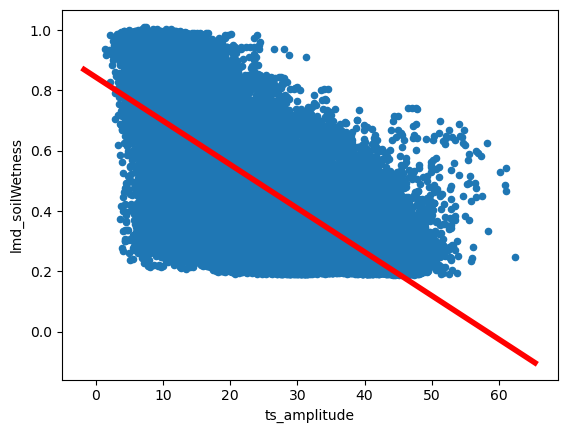

In [37]:
ax = data.plot.scatter('ts_amplitude','lmd_soilWetness')
abline(ax, results.params[0],results.params[1])

## Multiple Linear Regression

In [64]:
X = data[["backscatter","emissivity_v","emissivity_h","ts_amplitude","ndvi"]] 
y = data['lmd_soilWetness'] 
X = sm.add_constant(X) 
est = sm.OLS(y, X).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        lmd_soilWetness   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     9211.
Date:                Mon, 14 Jul 2025   Prob (F-statistic):               0.00
Time:                        13:20:22   Log-Likelihood:                 17245.
No. Observations:               44531   AIC:                        -3.448e+04
Df Residuals:                   44525   BIC:                        -3.442e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8653      0.058     15.013      0.000       0.752       0.978
backscatter      0.0074      0.001     13.743      0.000       0.006       0.008
emissivity_v     0.1046      0.084      1.243      0.214      -0.060       0.270
emissivity_h    -0.2269      0.043     -5.334      0.000      -0.310      -0.144
ts_amplitude    -0.0106      0.000    -99.962      0.000      -0.011      -0.010
ndvi             0.2148      0.007     28.885      0.000       0.200       0.229
==============================================================================
Omnibus:                      982.824   Durbin-Watson:                   0.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.979
Skew:                          -0.240   Prob(JB):                    6.33e-168
Kurtosis:                       2.571   Cond. No.                     3.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""